# Specifying the folder where images are present

In [2]:
TrainingImagePath = "C:\\Users\\hp\\Desktop\\Additional Projects\\archive (4)\\Train"

In [3]:
validationImagePath = "C:\\Users\\hp\\Desktop\\Additional Projects\\archive (4)\\Test"

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# base model

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./225)

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./225)

# Generating the training data

In [7]:
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                target_size = (64,64),
                                                batch_size = 20,
                                                class_mode = 'categorical')

Found 200 images belonging to 5 classes.


# Validation set

# Generating the validation data

In [8]:
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                target_size = (64,64),
                                                batch_size = 20,
                                                class_mode = 'categorical')

Found 40 images belonging to 5 classes.


# Libraries and model type

In [9]:
# Create CNN Deep learning model

In [10]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [11]:
# Initializing the Convolutional Neural Network

In [12]:
classifier = Sequential()

# MODEL

In [13]:
# STEP 1 Convolution
# Adding the first layer of CNN
# We are using the format (64,64,3) because we are using Tensorflow backend
# It means 3 matrix of size (64x64) pixels representing Red, Green and Blue components of pixels

In [14]:
classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation ='relu'))

In [15]:
#STEP 2- Max Pooling

In [16]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [17]:
# Additional layer of convolution for better accuracy

In [18]:
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

In [19]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [20]:
#STEP 3- Flattening

In [21]:
classifier.add(Flatten())

In [22]:
#STEP 4 - Fully connected neural network

In [23]:
classifier.add(Dense(64, activation='relu'))

In [32]:
classifier.add(Dense(5, activation='softmax'))

In [33]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8

# Compiler

In [34]:
# Compiling the CNN

In [35]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer = 'adam', metrics =['accuracy'])

# Execution of model

In [36]:
# Starting the model training

In [38]:
history = classifier.fit_generator(training_set, epochs =20,
                                  validation_data=validation_set)

Epoch 1/20
 1/10 [==>...........................] - ETA: 0s - loss: 1.1123 - accuracy: 0.8500

C:\Users\hp\AppData\Local\Temp\ipykernel_8832\2354014473.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs =20,


10/10 [==============================] - 1s 97ms/step - loss: 1.1098 - accuracy: 0.8000 - val_loss: 1.1394 - val_accuracy: 0.7250
Epoch 2/20
10/10 [==============================] - 1s 88ms/step - loss: 1.0997 - accuracy: 0.8000 - val_loss: 1.1301 - val_accuracy: 0.7500
Epoch 3/20
10/10 [==============================] - 1s 86ms/step - loss: 1.0900 - accuracy: 0.8000 - val_loss: 1.1214 - val_accuracy: 0.7250
Epoch 4/20
10/10 [==============================] - 1s 85ms/step - loss: 1.0800 - accuracy: 0.8000 - val_loss: 1.1131 - val_accuracy: 0.7250
Epoch 5/20
10/10 [==============================] - 1s 83ms/step - loss: 1.0704 - accuracy: 0.8000 - val_loss: 1.1045 - val_accuracy: 0.7250
Epoch 6/20
10/10 [==============================] - 1s 83ms/step - loss: 1.0608 - accuracy: 0.8000 - val_loss: 1.0959 - val_accuracy: 0.7250
Epoch 7/20
10/10 [==============================] - 1s 88ms/step - loss: 1.0517 - accuracy: 0.8000 - val_loss: 1.0869 - val_accuracy: 0.7250
Epoch 8/20
10/10 [======

# Accuracy base model

In [39]:
#Displaying curves of loss and accuracy during training

In [40]:
import matplotlib.pyplot as plt

In [41]:
acc = history.history['accuracy']

In [42]:
val_acc = history.history['val_accuracy']

In [43]:
loss = history.history['loss']

In [44]:
val_loss = history.history['val_loss']

In [45]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

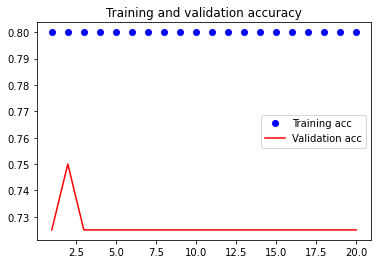

<Figure size 432x288 with 0 Axes>

In [46]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Loss base model

<Figure size 432x288 with 0 Axes>

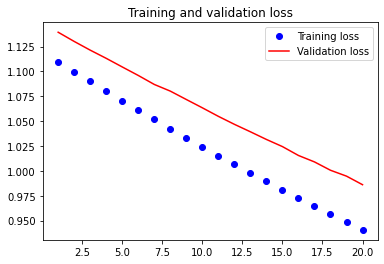

<Figure size 432x288 with 0 Axes>

In [47]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [48]:
# Lets improve

# Model 2

In [49]:
# Adding parameters in the ImageDatagenerator

In [50]:
train_datagen = ImageDataGenerator(rescale=1./225, shear_range=0.5,
                                  zoom_range=0.5, width_shift_range=0.2,
                                  height_shift_range=0.2)

In [51]:
# No transformations are done on the testing images

In [52]:
test_datgen = ImageDataGenerator(rescale=1./225)

In [53]:
# Generating the training data

In [54]:
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                target_size=(64,64),
                                                batch_size=20,
                                                class_mode='categorical')

Found 200 images belonging to 5 classes.


In [55]:
# Generating the validation data

In [56]:
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                target_size=(64,64),
                                                batch_size=20,
                                                class_mode='categorical')

Found 40 images belonging to 5 classes.


In [57]:
#Create Cnn deep learning model

In [58]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [59]:
# Initializing the Convolutional Neural Network

In [60]:
classifier = Sequential()

In [61]:
# Convolution

In [62]:
classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation ='relu'))

In [63]:
#Max Pooling

In [64]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [65]:
# Additional layer of convolution for better accuracy

In [66]:
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

In [67]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [68]:
#Flattening

In [69]:
classifier.add(Flatten())

In [70]:
#Fully connected neural network

In [71]:
classifier.add(Dense(64, activation='relu'))#hidden layer

In [72]:
classifier.add(Dense(5, activation='softmax'))#output layer

In [73]:
classifier.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [74]:
#Compiler

In [75]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])

In [76]:
#Execute

In [77]:
#Starting the model training

In [78]:
history = classifier.fit_generator(training_set, epochs =100,
                                  validation_data=validation_set)

Epoch 1/100


C:\Users\hp\AppData\Local\Temp\ipykernel_8832\346272482.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs =100,


10/10 [==============================] - 3s 165ms/step - loss: 1.7788 - accuracy: 0.1750 - val_loss: 1.5999 - val_accuracy: 0.3250
Epoch 2/100
10/10 [==============================] - 1s 119ms/step - loss: 1.6115 - accuracy: 0.2300 - val_loss: 1.6064 - val_accuracy: 0.2000
Epoch 3/100
10/10 [==============================] - 1s 113ms/step - loss: 1.6039 - accuracy: 0.2250 - val_loss: 1.5275 - val_accuracy: 0.3750
Epoch 4/100
10/10 [==============================] - 1s 124ms/step - loss: 1.5676 - accuracy: 0.2750 - val_loss: 1.3246 - val_accuracy: 0.6500
Epoch 5/100
10/10 [==============================] - 1s 121ms/step - loss: 1.5072 - accuracy: 0.3700 - val_loss: 0.9789 - val_accuracy: 0.7250
Epoch 6/100
10/10 [==============================] - 1s 118ms/step - loss: 1.3781 - accuracy: 0.4600 - val_loss: 0.7243 - val_accuracy: 0.7750
Epoch 7/100
10/10 [==============================] - 1s 131ms/step - loss: 1.2344 - accuracy: 0.5200 - val_loss: 0.6849 - val_accuracy: 0.6250
Epoch 8/100

10/10 [==============================] - 1s 103ms/step - loss: 0.3614 - accuracy: 0.8800 - val_loss: 0.5949 - val_accuracy: 0.8250
Epoch 59/100
10/10 [==============================] - 1s 100ms/step - loss: 0.3524 - accuracy: 0.8500 - val_loss: 0.8576 - val_accuracy: 0.8000
Epoch 60/100
10/10 [==============================] - 1s 108ms/step - loss: 0.4509 - accuracy: 0.8300 - val_loss: 0.4797 - val_accuracy: 0.8500
Epoch 61/100
10/10 [==============================] - 1s 103ms/step - loss: 0.4162 - accuracy: 0.8250 - val_loss: 0.8644 - val_accuracy: 0.7750
Epoch 62/100
10/10 [==============================] - 1s 103ms/step - loss: 0.3773 - accuracy: 0.8600 - val_loss: 0.8002 - val_accuracy: 0.8000
Epoch 63/100
10/10 [==============================] - 1s 101ms/step - loss: 0.3018 - accuracy: 0.8900 - val_loss: 0.9627 - val_accuracy: 0.8000
Epoch 64/100
10/10 [==============================] - 1s 105ms/step - loss: 0.3428 - accuracy: 0.8850 - val_loss: 0.3188 - val_accuracy: 0.8750
Epoch

In [79]:
#Displaying curves of loss and accuracy during training

In [80]:
import matplotlib.pyplot as plt

In [81]:
acc = history.history['accuracy']

In [82]:
val_acc = history.history['val_accuracy']

In [83]:
loss = history.history['loss']

In [84]:
val_loss = history.history['val_loss']

In [85]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

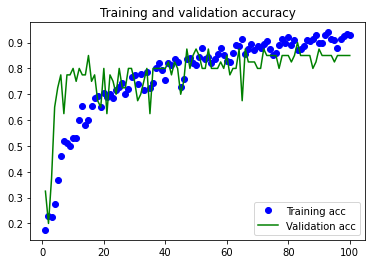

<Figure size 432x288 with 0 Axes>

In [86]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

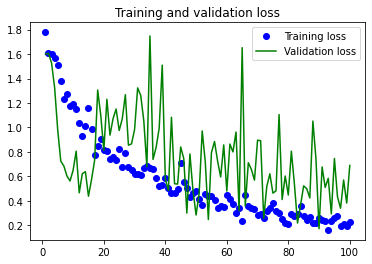

<Figure size 432x288 with 0 Axes>

In [87]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()